# 02: Geoprocessing


## imports


In [15]:
import pyogrio as ogr
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import geopandas as gpd
from lonboard import Map, PolygonLayer
from lonboard.colormap import apply_categorical_cmap

# done
# spatial join
# buildings to tax lots
# buildings in 3d with lonboard
# dissolve tax lot by lu or by owner

# not done
# union tax lots and sidewalk to get blocks in total
# intersect to show non-building area
# calculate soft site potential based on FAR, lot size, building class

In [16]:
# Load the GeoJSON files
mental_map_path = "C://Users/fauxi/OneDrive/Documents/GitHub/cdp-mapping-systems/Assignments/02_GeoprocessingAssignment/mapPoints.geojson"  # Replace with your file path


In [17]:
subway_lines_shapefile_path = "C://Users/fauxi/OneDrive/Documents/GitHub/cdp-mapping-systems/Assignments/02_GeoprocessingAssignment/Subway Lines/geo_export_ef0eae00-b96d-4154-95d7-4f731d438bd0.shp"  # Replace with your shapefile path

In [18]:
# Read the GeoJSON file into a GeoDataFrame
mental_map_gdf = gpd.read_file(mental_map_path)

In [19]:
# Read the shapefile into a GeoDataFrame
subway_lines_gdf = gpd.read_file(subway_lines_shapefile_path)

In [20]:
# Display the first few rows of each GeoDataFrame
print("Mental Map GeoDataFrame:")
print(mental_map_gdf.head())

Mental Map GeoDataFrame:
  103rd st 110 st cathedral parkway 116th street - Columbia University St  \
0     None                     None                                  None   
1     None                     None                                  None   
2     None                     None                                  None   
3     None                     None                                  None   
4     None                     None                                  None   

    311 34th st - Hudson Yards 50th st 59th st - Columbus Circle 66th st  \
0  None                   None    None                      None    None   
1  None                   None    None                      None    None   
2  None                   None    None                      None    None   
3                         None    None                      None    None   
4  None                   None    None                      None    None   

  72nd st 79 st  ... Macy's Pier 64 Port authority Bus 

In [21]:
print("\nSubway Lines GeoDataFrame:")
print(subway_lines_gdf.head())


Subway Lines GeoDataFrame:
          id name  objectid rt_symbol    shape_len  \
0  2000393.0    G     753.0         G  2438.200249   
1  2000394.0    G     754.0         G  3872.834411   
2  2000469.0    Q     755.0         N  1843.366331   
3  2000294.0    M     756.0         B  1919.559203   
4  2000296.0    M     757.0         B  2385.698536   

                                 url  \
0  http://web.mta.info/nyct/service/   
1  http://web.mta.info/nyct/service/   
2  http://web.mta.info/nyct/service/   
3  http://web.mta.info/nyct/service/   
4  http://web.mta.info/nyct/service/   

                                            geometry  
0  LINESTRING (-73.99488 40.68020, -73.99427 40.6...  
1  LINESTRING (-73.97958 40.65993, -73.97966 40.6...  
2  LINESTRING (-73.97586 40.57597, -73.97654 40.5...  
3  LINESTRING (-73.92414 40.75229, -73.92405 40.7...  
4  LINESTRING (-73.91345 40.75617, -73.90905 40.7...  


In [22]:
# Ensure both datasets are in the same CRS (WGS 84)
mental_map_gdf = mental_map_gdf.to_crs(epsg=4326)
subway_lines_gdf = subway_lines_gdf.to_crs(epsg=4326)

In [23]:
# Validate geometries
mental_map_gdf = mental_map_gdf[mental_map_gdf.is_valid]
subway_lines_gdf = subway_lines_gdf[subway_lines_gdf.is_valid]

In [24]:
# Print the CRS of both datasets to confirm
print(f"Mental Map CRS: {mental_map_gdf.crs}")
print(f"Subway Lines CRS: {subway_lines_gdf.crs}")

Mental Map CRS: EPSG:4326
Subway Lines CRS: EPSG:4326


In [25]:
# Perform a spatial join to find intersecting subway stations with the mental map points
intersections = gpd.sjoin(mental_map_gdf, subway_lines_gdf, how="inner", predicate="intersects")

# Print the resulting intersections
print(intersections.head())

Empty GeoDataFrame
Columns: [103rd st, 110 st cathedral parkway, 116th street - Columbia University St, 311, 34th st - Hudson Yards, 50th st, 59th st - Columbus Circle, 66th st, 72nd st, 79 st, 86 st, 96 st, Arts and Crafts Beer Parlor, Avery Hall, Columbia university, Ellington in the park, Grand Central Terminal, Guggenheim Museum, John F. Kennedy International Airport,, Kent Hall - Columbia University, Lily's Craft & kitchen, Macy's, Pier 64, Port authority Bus Terminal, The Shops & Restaurants at Hudson Yards, Times Square St, Veranos Restaurant, Vessel, Whole Foods market, Woodbury Common Premium Outlets, geometry, index_right, id, name, objectid, rt_symbol, shape_len, url]
Index: []

[0 rows x 38 columns]


In [36]:
# Overlay the mental map routes with the subway lines
routes_overlay = gpd.overlay(mental_map_gdf, subway_lines_gdf, how="intersection")

# Print the resulting overlay
print(routes_overlay.head())

Empty GeoDataFrame
Columns: [103rd st, 110 st cathedral parkway, 116th street - Columbia University St, 311, 34th st - Hudson Yards, 50th st, 59th st - Columbus Circle, 66th st, 72nd st, 79 st, 86 st, 96 st, Arts and Crafts Beer Parlor, Avery Hall, Columbia university, Ellington in the park, Grand Central Terminal, Guggenheim Museum, John F. Kennedy International Airport,, Kent Hall - Columbia University, Lily's Craft & kitchen, Macy's, Pier 64, Port authority Bus Terminal, The Shops & Restaurants at Hudson Yards, Times Square St, Veranos Restaurant, Vessel, Whole Foods market, Woodbury Common Premium Outlets, id, name, objectid, rt_symbol, shape_len, url, geometry]
Index: []

[0 rows x 37 columns]


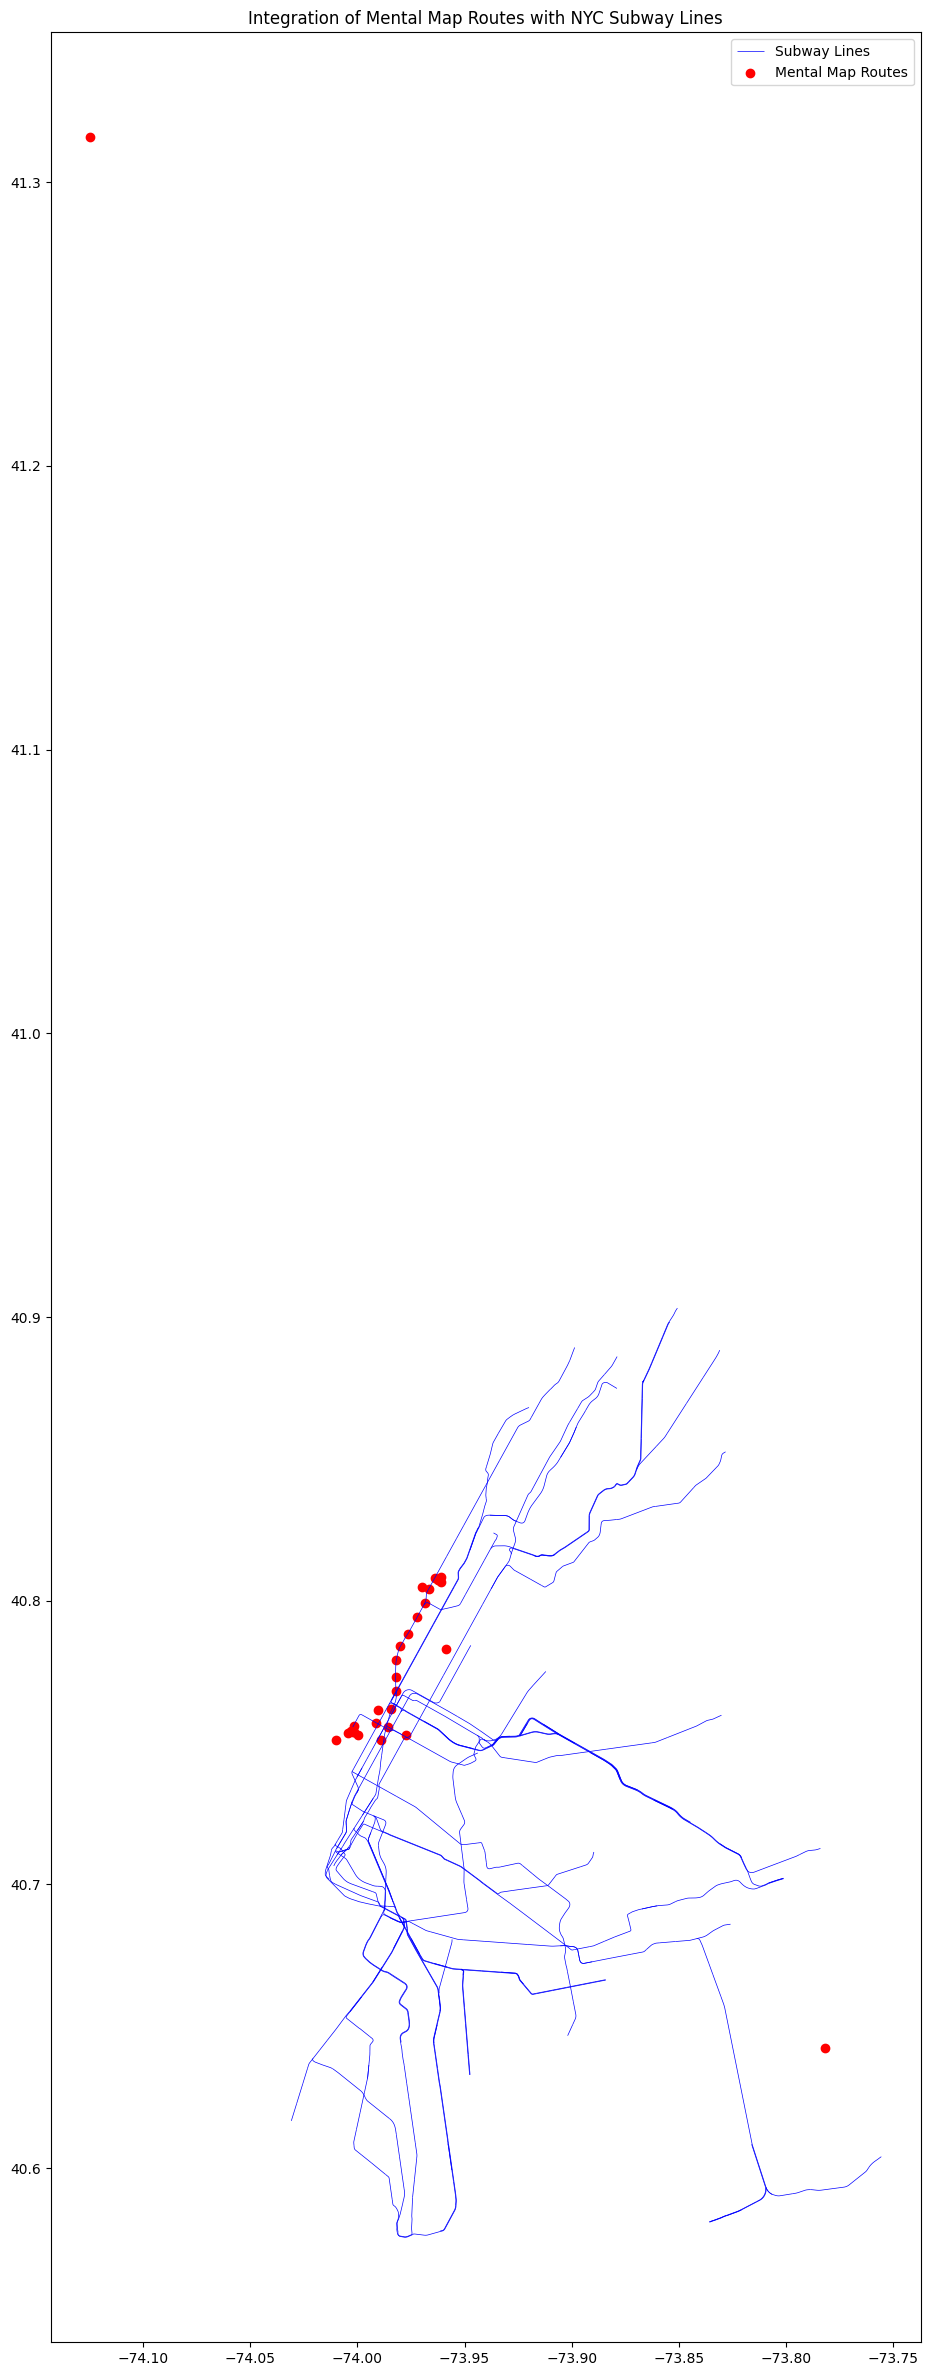

In [38]:
# Plot the mental map routes and subway lines
fig, ax = plt.subplots(figsize=(30, 30))

# Plot subway lines
subway_lines_gdf.plot(ax=ax, color='blue', linewidth=0.5, label='Subway Lines')

# Plot mental map routes
mental_map_gdf.plot(ax=ax, color='red', linewidth=1, label='Mental Map Routes')

# Plot intersecting points if they exist
if not intersections.empty:
    intersections.plot(ax=ax, color='green', marker='o', label='Intersecting Points')

# Plot overlay routes if they exist
if not routes_overlay.empty:
    routes_overlay.plot(ax=ax, color='purple', linewidth=1, linestyle='--', label='Overlay Routes')

# Set plot title and legend
plt.title('Integration of Mental Map Routes with NYC Subway Lines')
plt.legend()
plt.show()
